In [1]:
import math
import tensorflow as tf
from tensorflow.contrib import learn
import numpy as np
import pylab as plt
import pickle
import os
import csv
import sys
import time
from datetime import timedelta
import pandas

C:\Users\lzcai\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
LEARNING_RATE = 0.01
EPOCHS = 2000
BATCH_SIZE = 128
MAX_DOC_LEN = 100
CHAR_DEPTH = 256
WORD_WIDTH = 20
NUM_CLASSES = 15
DROP = True
EMBEDDING_SIZE = 50
NUM_HIDDEN = 20
NUM_LAYER = 2

seed = 10
np.random.seed(seed)
tf.set_random_seed(seed)

In [21]:
DATA_DIR = "..\data"
SAVE_DIR = "..\data\PartB_Result"
RESULT_DIR = "../data/PartB_Result/Q6/4-b"
TRAIN_CHAR_FILENAME = "Train_char.out"
TEST_CHAR_FILENAME = "Test_char.out"
TRAIN_WORD_FILENAME = "Train_word_raw.out"
TEST_WORD_FILENAME = "Test_word_raw.out"

In [4]:
with open(os.path.join(SAVE_DIR, TRAIN_WORD_FILENAME),"rb") as f:
    trainX, tmp_trainY = pickle.load(f)

In [5]:
with open(os.path.join(SAVE_DIR, TEST_WORD_FILENAME),"rb") as f:
    testX, tmp_testY = pickle.load(f)

In [6]:
trainY_targets = np.array(tmp_trainY).reshape(-1)
trainY = np.eye(NUM_CLASSES)[trainY_targets]

testY_targets = np.array(tmp_testY).reshape(-1)
testY = np.eye(NUM_CLASSES)[testY_targets]
# trainY = y_train
# testY = y_test

In [7]:
def get_a_cell(size):
    cell = tf.nn.rnn_cell.GRUCell(size)
#     drop = tf.nn.rnn_cell.DropoutWrapper(lstm, output_keep_prob=keep_prob)
    return cell

def rnn_model(x, n_words):

    word_vectors = tf.contrib.layers.embed_sequence(
        x, vocab_size=n_words, embed_dim=EMBEDDING_SIZE)

    word_list = tf.unstack(word_vectors, axis=1)

    cells = [get_a_cell(NUM_HIDDEN) for _ in range(NUM_LAYER)]
    stacked_rnn_cell = tf.nn.rnn_cell.MultiRNNCell(cells)
    print("stacked_rnn_cell: ", stacked_rnn_cell)
    cell_wrapped = tf.contrib.rnn.OutputProjectionWrapper(stacked_rnn_cell, output_size = 1)
    print("cell_wrapped: ", cell_wrapped)
    
    _, encoding = tf.nn.static_rnn(cell_wrapped, word_list, dtype=tf.float32)
    print("encoding: ", encoding)
    
    logits = tf.layers.dense(encoding[1], NUM_CLASSES, activation=None)

    return logits, word_list

In [8]:
n_words = max([max(tmp) for tmp in trainX]+[max(tmp) for tmp in testX])

In [9]:
n_words

37361

In [10]:
def setup_cross_entropy(labels, logits):
    return tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=logits)

def setup_correct_prediction(labels, logits):
    return tf.cast(tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1)), tf.float32)

In [11]:
x = tf.placeholder(tf.int64, [None, MAX_DOC_LEN])
d = tf.placeholder(tf.float32, [None, NUM_CLASSES])
y, word_list = rnn_model(x, n_words)

cross_entropy = setup_cross_entropy(labels=d, logits=y)
loss = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(LEARNING_RATE)
train_op = optimizer.minimize(loss)

stacked_rnn_cell:  <tensorflow.python.ops.rnn_cell_impl.MultiRNNCell object at 0x000002785EFA2C50>
cell_wrapped:  <tensorflow.contrib.rnn.python.ops.core_rnn_cell.OutputProjectionWrapper object at 0x000002785EFA2BE0>
encoding:  (<tf.Tensor 'rnn/rnn/output_projection_wrapper/output_projection_wrapper/multi_rnn_cell/cell_0/gru_cell/add_99:0' shape=(?, 20) dtype=float32>, <tf.Tensor 'rnn/rnn/output_projection_wrapper/output_projection_wrapper/multi_rnn_cell/cell_1/gru_cell/add_99:0' shape=(?, 20) dtype=float32>)


In [12]:
correct_prediction = setup_correct_prediction(labels=d, logits=y)
accuracy = tf.reduce_mean(correct_prediction)

In [22]:
saver = tf.train.Saver()
if not os.path.exists(RESULT_DIR):
    print("Not Exist")
    os.makedirs(RESULT_DIR)

Not Exist


In [14]:
def plot_graph(EPOCHS, BATCH_SIZE, acc_record, fileName, isTrain, error = False):
    if error:  
        acc_record = [1-tmp for tmp in acc_record]
        if isTrain:
            yLabel = 'Train error'
        else:
            yLabel = 'Test error'
    else:
        if isTrain:
            yLabel = 'Train accuracy'
        else:
            yLabel = 'Test accuracy'
    plt.figure(1)
    plt.plot(range(EPOCHS), acc_record)
    plt.xlabel(str(EPOCHS) + ' iterations')
    plt.ylabel(yLabel)
    plt.savefig(os.path.join(RESULT_DIR, fileName))
    plt.show()

In [15]:
def validation_accuracy(testX, testY):
    output_2_, accuracy_ = session.run([y, accuracy], feed_dict={x: testX, d: testY})
    print(output_2_, '\n',accuracy_)

In [16]:
train_acc_backup = []
test_acc_backup = []
time_usage_backup = []
total_time_backup = []

iter 0: Train accuracy 0.0716071 Test accuracy:  0.071428575 *
Time usage: 0:00:15
iter 100: Train accuracy 0.967321 Test accuracy:  0.51428574 *
Time usage: 0:00:52
iter 200: Train accuracy 0.999643 Test accuracy:  0.5557143 *
Time usage: 0:01:29
iter 300: Train accuracy 1 Test accuracy:  0.55714285 *
Time usage: 0:02:06
iter 400: Train accuracy 1 Test accuracy:  0.54571426 
Time usage: 0:02:41
iter 500: Train accuracy 1 Test accuracy:  0.5342857 
Time usage: 0:03:17
iter 600: Train accuracy 1 Test accuracy:  0.53571427 
Time usage: 0:03:52
iter 700: Train accuracy 1 Test accuracy:  0.5314286 
Time usage: 0:04:28
iter 800: Train accuracy 1 Test accuracy:  0.5285714 
Time usage: 0:05:03
iter 900: Train accuracy 0.999286 Test accuracy:  0.5214286 
Time usage: 0:05:39
iter 1000: Train accuracy 1 Test accuracy:  0.53 
Time usage: 0:06:14
iter 1100: Train accuracy 1 Test accuracy:  0.5257143 
Time usage: 0:06:50
iter 1200: Train accuracy 1 Test accuracy:  0.5228571 
Time usage: 0:07:26
ite

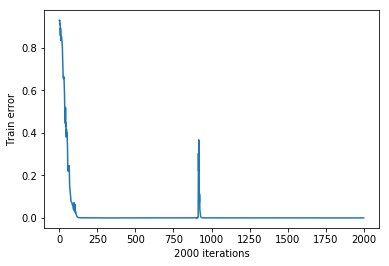

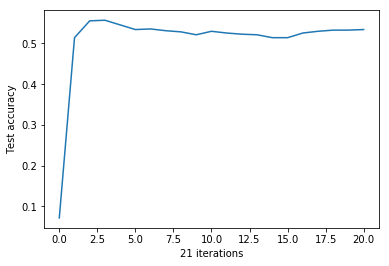

In [17]:
# print("BATCH_SIZE=", BATCH_SIZE)
total_iterations = 0
train_acc = []
start_time = time.time()
train_acc_record = []
test_acc_record = []
epoch_time_record = []

best_test_acc = 0.0
last_improvement = 0
improved_str = ""
test_count = 0
train_count = 0
mul = int(len(trainX)/BATCH_SIZE)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(EPOCHS):
        epoch_start_time = time.time()
        
#         for j in range(len(x_allBatch)):
#         for j in range(mul):
#             feed_dict_train = {x: x_allBatch[j], d: y_allBatch[j]}
#             x_batch, d_batch = next_batch(BATCH_SIZE, trainX, trainY)
        feed_dict_train = {x: trainX, d: trainY}
        sess.run(train_op, feed_dict=feed_dict_train)
        train_acc_record.append(accuracy.eval(feed_dict=feed_dict_train))
        train_count += 1
            
        epoch_end_time = time.time()
        epoch_time_diff = epoch_end_time-epoch_start_time
        epoch_time_record.append(epoch_time_diff)

        if (i % 100 == 0) or (i == (EPOCHS - 1)):
            test_count += 1
            test_accuracy = sess.run(accuracy, feed_dict={x: testX, d: testY})
            test_acc_record.append(test_accuracy)
            if DROP:
                if test_accuracy > best_test_acc:
                    best_test_acc = test_accuracy
                    last_improvement = i
                    saver.save(sess=sess, save_path=RESULT_DIR)
                    improved_str = "*"
                else:
                    improved_str = ''
            else:
                saver.save(sess=sess, save_path=RESULT_DIR)

            print('iter %d: Train accuracy %g'%(i, train_acc_record[i]), 'Test accuracy: ',test_accuracy, improved_str)
            print("Time usage: " + str(timedelta(seconds=int(round(time.time()-start_time)))))


# Ending time.
end_time = time.time()

# Difference between start and end-times.
time_dif = end_time - start_time

# Print the time-usage.
print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))

train_graphName = "PartB-Q4-Train"+str(EPOCHS)+'-'+str(BATCH_SIZE)+".png"
test_graphName = "PartB-Q4-Test"+str(EPOCHS)+'-'+str(BATCH_SIZE)+".png"
plot_graph(train_count, BATCH_SIZE, train_acc_record,train_graphName, isTrain = True, error=True)
plot_graph(test_count, BATCH_SIZE, test_acc_record, test_graphName, isTrain = False)


train_acc_backup.append(train_acc_record)
test_acc_backup.append(test_acc_record)
time_usage_backup.append(epoch_time_record)
total_time_backup.append(time_dif)

#=========== Save all the data for EACH TRAINING Has Done ============#
fileNameTail = str(EPOCHS)+'-'+str(BATCH_SIZE)+".out"

train_acc_filename = "PartB-Q4-Train_Acc-"+fileNameTail
with open(os.path.join(RESULT_DIR, train_acc_filename), 'wb') as fp:
    pickle.dump(train_acc_backup, fp)

test_acc_filename = "PartB-Q4-Test_Acc-"+fileNameTail
with open(os.path.join(RESULT_DIR, train_acc_filename), 'wb') as fp:
    pickle.dump(test_acc_backup, fp)

time_usage_filename = "PartB-Q4-Time_Usage-"+fileNameTail
with open(os.path.join(RESULT_DIR, time_usage_filename), 'wb') as fp:
    pickle.dump(time_usage_backup, fp)

time_usage_filename = "PartB-Q4-Time_Usage-"+fileNameTail
with open(os.path.join(RESULT_DIR, time_usage_filename), 'wb') as fp:
    pickle.dump(time_usage_backup, fp)        


In [24]:
fileNameTail = str(EPOCHS)+'-'+str(BATCH_SIZE)+".out"

train_acc_filename = "PartB-Q4-Train_Acc-"+fileNameTail
with open(os.path.join(RESULT_DIR, train_acc_filename), 'wb') as fp:
    pickle.dump(train_acc_backup, fp)

test_acc_filename = "PartB-Q4-Test_Acc-"+fileNameTail
with open(os.path.join(RESULT_DIR, test_acc_filename), 'wb') as fp:
    pickle.dump(test_acc_backup, fp)

time_usage_filename1 = "PartB-Q4-Time_Usage-"+fileNameTail
with open(os.path.join(RESULT_DIR, time_usage_filename1), 'wb') as fp:
    pickle.dump(time_usage_backup, fp)

time_usage_filename = "PartB-Q4-Time_Usage-"+fileNameTail
with open(os.path.join(RESULT_DIR, time_usage_filename2), 'wb') as fp:
    pickle.dump(time_usage_backup, fp)   